# Titanic: Machine Learning from Disaster

In this project, we will perform an exploratory data analysis on what sorts of people were likely to survive the sensational titanic tragedy on April 15th, 1912.

![alt text](https://d1nz104zbf64va.cloudfront.net/dt/a/o/top-7-strangely-unique-things-that-sank-with-titanic.jpg)

This project will look at the Titanic dataset, offered by kaggle at the following website:

https://www.kaggle.com/c/titanic

## Titanic Passengers Exploratory Data Analysis

In [8]:
# import dependencies
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

#enable inline plot
%matplotlib inline

In [9]:
# uses pandas library to read the .csv file of passengers on titanic and store in a dataframe object
titanic = pd.read_csv('data/train.csv')

# print the first few lines of the dataframe
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# print basic information about the dataframe
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [12]:
# number of males and females on board
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
# number of passengers that survived the disaster
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

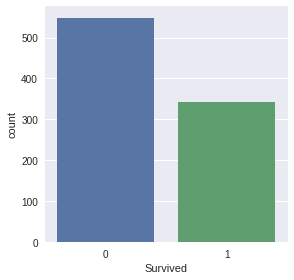

In [20]:
# survival counts
sns.factorplot('Survived',data=titanic,kind='count')

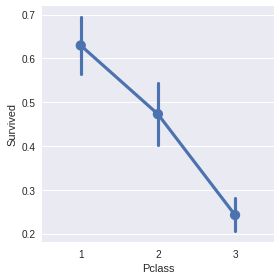

In [26]:
# those who survived, by cabin class
sns.factorplot('Pclass','Survived',data=titanic)

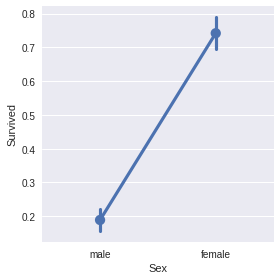

In [27]:
# those who survived, by sex
sns.factorplot('Sex','Survived',data=titanic)

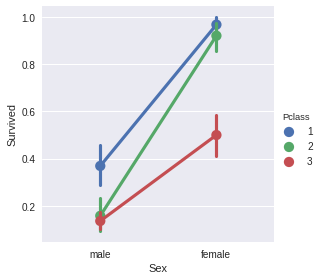

In [29]:
# those who survived, by sex and also by cabinclass
sns.factorplot('Sex','Survived',hue='Pclass',data=titanic)

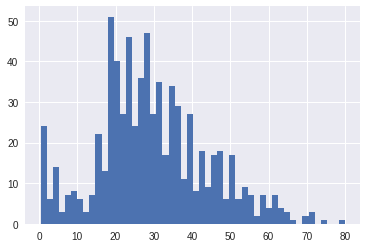

In [30]:
# histogram of age
titanic['Age'].hist(bins=50)

/home/anthony/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


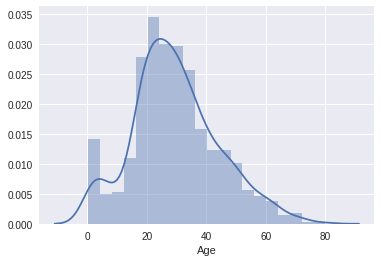

In [32]:
# overlay histogram with kernel density approximator (KDE)
sns.distplot(titanic['Age'].dropna())

/home/anthony/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


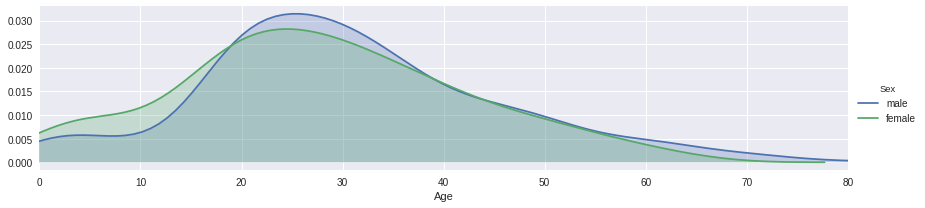

In [33]:
# plot multiple KDE plots of age and sex on the same plot, using FacetGrid
fig = sns.FacetGrid(titanic,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

/home/anthony/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


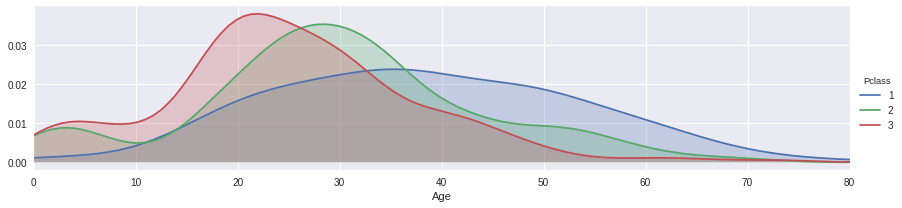

In [34]:
# plot multiple KDE plots of age and Pclass on the same plot, using FacetGrid
fig = sns.FacetGrid(titanic,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade='True')
oldest = titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()